## IRIS CLASSIFICATION PROJECT


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### DATA

In [3]:
df = pd.read_csv('DATA/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: xlabel='Species', ylabel='count'>

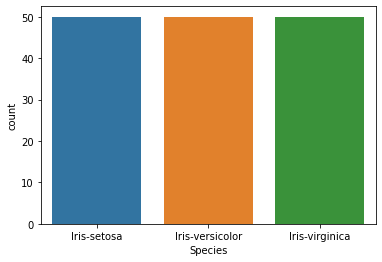

In [4]:
sns.countplot(data=df, x='Species')

#### DATA PREPARATIONS

In [5]:
df = df.drop('Id', axis=1)

X = df.drop('Species', axis=1)
y = df['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### GRID SEARCH

In [7]:
from sklearn.svm import SVC
svc = SVC()

params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'kernel': ['rbf', 'linear', 'poly'],
          'degree': [1,2,3,4,5],
          'gamma': ['auto', 'scale']}
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(svc, params)
model.fit(scaled_X_train, y_train)
model.best_params_

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

#### PERFORMANCE EVALUATION

In [8]:
from sklearn.metrics import classification_report

##### TRAIN DATA

In [9]:
train_y_pred = model.predict(scaled_X_train)
print(classification_report(y_train, train_y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.97      0.97        30
 Iris-virginica       0.97      0.97      0.97        38

       accuracy                           0.98       105
      macro avg       0.98      0.98      0.98       105
   weighted avg       0.98      0.98      0.98       105



##### TEST DATA

In [10]:
test_y_pred = model.predict(scaled_X_test)
print(classification_report(y_test, test_y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



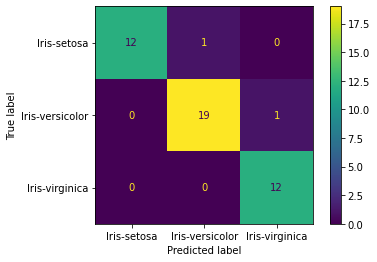

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, test_y_pred)